Xicheng XIA

# Mean–Variance Analysis

Industry_Portfolios.xlsx contains monthly nominal (net) returns for ten industry portfolios, expressed as a percentage. These returns cover the ten-year period from Jan 2004 through Dec 2013.

Calculate the vector of mean returns and covariance matrix of returns for the ten industry portfolios. Create a table showing the mean returns and standard deviation of returns for the ten industry portfolios. Also plot the minimum-variance frontier generated by the ten industry portfolios, with mean return on the y axis and standard deviation of return on the x axis. The plot should cover the range from 0% to 2% per month on the y axis. Briefly explain the economic significance of this minimum-variance frontier.

Now suppose that the risk-free rate is 0.13% per month. Plot the efficient frontier (with the riskless asset) on the same plot as the minimum-variance frontier generated by the ten industry portfolios. Briefly explain the economic significance of this efficient frontier.

The two frontiers will intersect at single point: the tangency portfolio. Calculate the weights of the ten industry portfolios at the tangency portfolio. Briefly explain the economic significance of this tangency portfolio.

Please submit your results (including graphs and qualitative discussion of economic significance, as MS Word or Adobe PDF document, without compressing) and programming code to the submission folder for Homework 1 before the start of the lecture on Wednesday, 24 October.

Economic Significance:

*    The minimum-variance frontiers consists of the set of portfolios with least risk (i.e., std. dev. of return) for a given target mean return.

*   The efficient frontier consists of the set of portfolios with highest mean return for a given level of risk.

*    The tangency portfolio is the risky-asset-only portfolio with the highest Sharpe ratio, which makes it optimal for all risk-averse investors to hold some combination of the tangency portfolio and riskless asset.


In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.facecolor'] = '1.'

In [3]:
# read data
df = pd.read_excel('Industry_Portfolios.xlsx')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y%m')
df = df.set_index('Date')

Create a table showing the mean returns and standard deviation of returns for the ten industry portfolios

In [4]:
# calculate the mean and varaince of return
Mean_Variance_Each = pd.concat([df.std()**2, df.mean()], axis = 1) 

# create a table
Mean_Variance_Each.columns = columns = ['Varaince(%^2)', 'Mean(%)'] 

Mean_Variance_Each.T

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Varaince(%^2),11.193422,69.920577,28.198970,36.984933,28.95722,19.787227,16.759084,14.342669,13.703052,31.163771
Mean(%),0.902833,0.733333,1.012833,1.231167,0.76625,0.881417,0.916333,0.783833,0.907167,0.489083


Define the function for calculating the minimum variance of return for each given mean of return.

In [5]:
def frontier(V, R, Rp):
    ''' Frontier function
    Calculate the minimum variance of return for a given mean of return.
    Input:
    --- V:     n by n covariance matrix,
                 numpy.array object or numpy.matrix object;
                 
    --- R:     n by 1 mean return matrix,
                  numpy.array object or numpy.matrix object;
                  
    --- Rp:   Expected return of the frontier portfolio, 
                  float type.
    
    Ouput:
    --- variance: variance of the frontier portfolio,      
                         float type.
    --- w: weight of optimal portfolio,
              numpy.array type or numpy.matrix type
    '''
    # reshape return matrix, guarantee the shape of it
    R = R.reshape((max(R.shape), 1))
    
    assert(V.shape[0] == V.shape[1])
    assert(R.shape[0] == V.shape[0])
    
    # define e = (1; : : : ; 1)'
    e = np.ones((R.shape[0], 1))
    
    # calculate alpha, zeta, and sigma
    alpha = np.dot(np.dot(R.T, np.linalg.inv(V)), e)
    zeta = np.dot(np.dot(R.T, np.linalg.inv(V)), R)
    sigma = np.dot(np.dot(e.T, np.linalg.inv(V)), e)
    
    # variance of return for frontier portfolio
    variance = 1/sigma +sigma/(zeta*sigma - alpha**2)*(Rp - alpha/sigma)**2
    
    # weight of frontier portfolio
    w = ((sigma*Rp - alpha)/(zeta*sigma - alpha**2))*np.dot(np.linalg.inv(V), R) \
    + ((zeta - alpha*Rp)/(zeta*sigma - alpha**2))*np.dot(np.linalg.inv(V), e)
    
    return float(variance), w

In [6]:
V = df.cov().values # covariance matrix
R = df.mean().values # mean return matrix

# list of given mean of return
Return_lst = np.arange(0, 2.5, 0.01) 

# list of varaince of return
Variance_lst = [] 
for Rp in Return_lst:
    Variance_lst.append(frontier(V, R, Rp)[0]) 

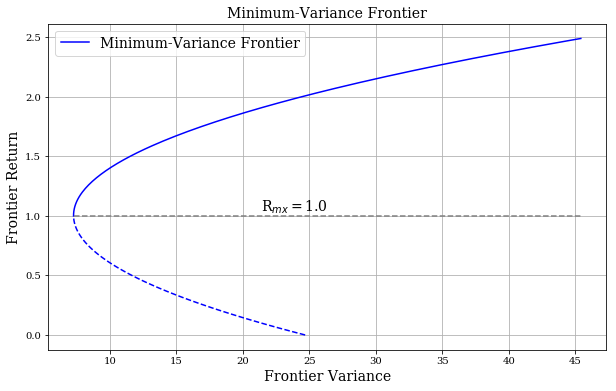

In [7]:
z = 2
fig = plt.figure(figsize = (10, 6))
ind = Variance_lst.index(min(Variance_lst))

plt.plot(Variance_lst[ind:], Return_lst[ind:],  color = 'blue', label = 'Minimum-Variance Frontier')
plt.plot(Variance_lst[:ind+1], Return_lst[:ind+1],  '--', color = 'blue')
plt.plot([min(Variance_lst), max(Variance_lst)], [Return_lst[ind]]*2, '--', color = 'gray')
plt.text(Variance_lst[10], Return_lst[ind], 'R$%s$'%'_{mx} = '\
         + str(round(Return_lst[ind], 4)), verticalalignment = 'bottom', fontsize = 7*z)

plt.xlabel('Frontier Variance', fontsize = 7*z)
plt.ylabel('Frontier Return', fontsize = 7*z)
plt.title('Minimum-Variance Frontier', fontsize = 7*z)
plt.legend(loc = 'best', fontsize = 7*z)
plt.grid(True)
plt.show()

A combinition of efficient frontier and utility line can give you the optimal assets allocation weights. People with different risk prefference may have difference optimal portfolio lying on the frontier. 

Any portfolio lying under the efficient frontier is sub-optimal. It doesn't provide as much return as the frontier portfolio while suffering from the same level of risk.

Define the function for calculating the minimum variance of return for a given mean of return and a risk free asset.

In [8]:
def frontier_rf(V, R, Rp, Rf):
    ''' Frontier function with risk free asset.
    Calculate the minimum variance of return for a given mean of return and a risk free asset.
    
    Input:
    --- V:   n by n covariance matrix, 
                numpy.array object or numpy.matrix object;
                
    --- R:   n by 1 mean return matix,
                 numpy.array object or numpy.matrix object;
                 
    --- Rp: Expected return of the frontier portfolio, 
                float;
                
    --- Rf:  Risk free rate, 
                 float.
    
    Ouput:
    --- variance: variance of the frontier portfolio, 
                         float type.
    '''
    # reshape return matrix, guarantee the shape of it
    R = R.reshape((max(R.shape), 1))
    
    assert(V.shape[0] == V.shape[1])
    assert(R.shape[0] == V.shape[0])
    
    # define e = (1; : : : ; 1)'
    e = np.ones((R.shape[0], 1))
    
    # calculate alpha, zeta, and sigma
    alpha = np.dot(np.dot(R.T, np.linalg.inv(V)), e)
    zeta = np.dot(np.dot(R.T, np.linalg.inv(V)), R)
    sigma = np.dot(np.dot(e.T, np.linalg.inv(V)), e)
    
    # variance of return for frontier portfolio
    variance = (Rp - Rf)**2/(zeta - 2*alpha*Rf +sigma*Rf**2)
    return float(variance)

Define the function for calculating mean and variance of return for tangency portfolio.

In [9]:
def tangency_portfolio(V, R, Rf):
    ''' Tangency portfolio function.
    Calculate mean and variance of return for tangency portfolio.
    
    Input:
    --- V:  n by n covariance matrix,
               numpy.array object or numpy.matrix object;
               
    --- R:  n by 1 mean return matrix,  
               numpy.array object or numpy.matrix object;
               
    --- Rf: Risk free rate,
                float.
    
    Ouput:
    --- Rtg: return of the tangency portfolio, 
                 float type;
                 
    --- Vtg: variance of the tangency portfolio, 
                  float type.
    '''
    # reshape return matrix, guarantee the shape of it
    R = R.reshape((max(R.shape), 1))
    
    assert(V.shape[0] == V.shape[1])
    assert(R.shape[0] == V.shape[0])
    
    # define e = (1; : : : ; 1)'
    e = np.ones((R.shape[0], 1))
    
    # calculate alpha, zeta, and sigma
    alpha = np.dot(np.dot(R.T, np.linalg.inv(V)), e)
    zeta = np.dot(np.dot(R.T, np.linalg.inv(V)), R)
    sigma = np.dot(np.dot(e.T, np.linalg.inv(V)), e)
    
    # variance of return for frontier portfolio
    Rtg = (alpha*Rf - zeta)/(alpha*Rf - sigma)
    Vtg = 1/sigma*(1 + (zeta*sigma - alpha**2)/(sigma*Rf - alpha)**2)
    return float(Rtg), float(Vtg)

In [10]:
V = df.cov().values # covariance matrix
R = df.mean().values # mean return matrix
Rf = 0.13

# calculate mean and variance of return for tangency portfolio.
Rtg, Vtg = tangency_portfolio(V, R, Rf) 

# list of given mean of return
Return_rf_lst = np.arange(0, 2.5, 0.01)

#calculating the minimum variance of return for a given mean of return and a risk free asset.
Variance_rf_lst = []
for Rp in Return_rf_lst:
    Variance_rf_lst.append(frontier_rf(V, R, Rp, Rf)) 

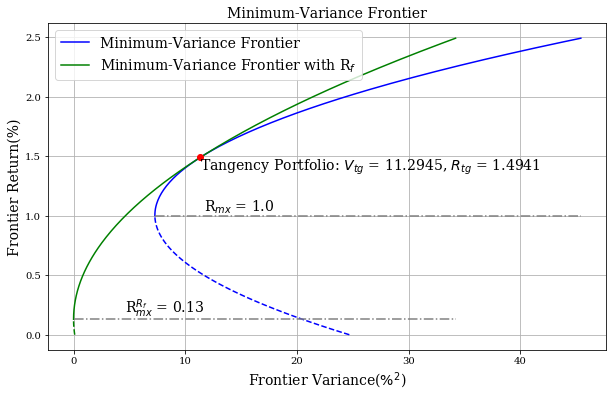

In [11]:
z = 2
fig = plt.figure(figsize = (10, 6))

ind = Variance_lst.index(min(Variance_lst))
ind_rf = Variance_rf_lst.index(min(Variance_rf_lst))

plt.plot(Variance_lst[ind:], Return_lst[ind:],  color = 'blue',
         label = 'Minimum-Variance Frontier')
plt.plot(Variance_lst[:ind+1], Return_lst[:ind+1],  '--', color = 'blue')

plt.plot(Variance_rf_lst[ind_rf:], Return_rf_lst[ind_rf:],  color = 'green',
         label = 'Minimum-Variance Frontier with R$%s$'%'_f')
plt.plot(Variance_rf_lst[:ind_rf+1], Return_rf_lst[:ind_rf+1],  '--', color = 'green')

plt.plot([min(Variance_lst), max(Variance_lst)], [Return_lst[ind]]*2, '-.', color = 'gray')
plt.text(Variance_lst[50], Return_lst[ind], 'R$%s$ = '%'_{mx}'+str(Return_lst[ind]),
         verticalalignment='bottom', fontsize = 7*z)

plt.plot([min(Variance_rf_lst), max(Variance_rf_lst)], [Return_rf_lst[ind_rf]]*2, '-.', color = 'gray')
plt.text(Variance_rf_lst[100], Return_rf_lst[ind_rf], 'R$%s$ = '%'_{mx}^{R_f}'\
         +str(Return_rf_lst[ind_rf]), verticalalignment='bottom', fontsize = 7*z)

plt.plot(Vtg, Rtg, 'o', color = 'red', lw = 2)
plt.text(Vtg, Rtg, 'Tangency Portfolio: $%s$ = '%'V_{tg}'+str(round(Vtg,4)) \
         + ', $%s$ = '%'R_{tg}'+str(round(Rtg, 4)), verticalalignment='top', fontsize = 7*z)

plt.xlabel('Frontier Variance($%s$)'%'\%^2', fontsize = 7*z)
plt.ylabel('Frontier Return(%)', fontsize = 7*z)
plt.title('Minimum-Variance Frontier', fontsize = 7*z)
plt.legend(loc = 'upper left', fontsize = 7*z)
plt.grid(True)
plt.show()

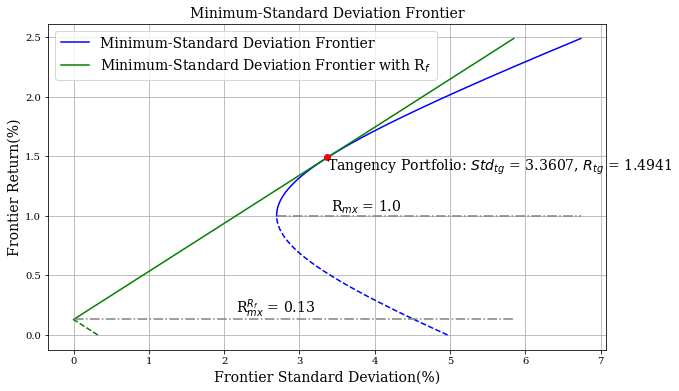

In [12]:
Std_lst = [np.sqrt(V) for V in Variance_lst]
Std_rf_lst = [np.sqrt(V) for V in Variance_rf_lst]
z = 2
fig = plt.figure(figsize = (10, 6))

ind = Std_lst.index(min(Std_lst))
ind_rf = Std_rf_lst.index(min(Std_rf_lst))

plt.plot(Std_lst[ind:], Return_lst[ind:],  color = 'blue', 
         label = 'Minimum-Standard Deviation Frontier')
plt.plot(Std_lst[:ind+1], Return_lst[:ind+1],  '--', color = 'blue')

plt.plot(Std_rf_lst[ind_rf:], Return_rf_lst[ind_rf:],  color = 'green', 
         label = 'Minimum-Standard Deviation Frontier with R$%s$'%'_f')
plt.plot(Std_rf_lst[:ind_rf+1], Return_rf_lst[:ind_rf+1],  '--', color = 'green')

plt.plot([min(Std_lst), max(Std_lst)], [Return_lst[ind]]*2, '-.', color = 'gray')
plt.text(Std_lst[50], Return_lst[ind], 'R$%s$ = '%'_{mx}'+str(Return_lst[ind]),
         verticalalignment='bottom', fontsize = 7*z)

plt.plot([min(Std_rf_lst), max(Std_rf_lst)], [Return_rf_lst[ind_rf]]*2, '-.', color = 'gray')
plt.text(Std_rf_lst[100], Return_rf_lst[ind_rf], 'R$%s$ = '%'_{mx}^{R_f}'\
         +str(Return_rf_lst[ind_rf]), verticalalignment='bottom', fontsize = 7*z)

plt.plot(np.sqrt(Vtg), Rtg, 'o', color = 'red', lw = 2)
plt.text(np.sqrt(Vtg), Rtg, 'Tangency Portfolio: $%s$ = '%'Std_{tg}'+str(round(np.sqrt(Vtg), 4)) \
         + ', $%s$ = '%'R_{tg}'+str(round(Rtg, 4)), verticalalignment='top', fontsize = 7*z)

plt.xlabel('Frontier Standard Deviation(%)', fontsize = 7*z)
plt.ylabel('Frontier Return(%)', fontsize = 7*z)
plt.title('Minimum-Standard Deviation Frontier', fontsize = 7*z)
plt.legend(loc = 'upper left', fontsize = 7*z)
plt.grid(True)
plt.show()

In [13]:
# calculate the weight for tangency portfolio.
weight_of_risky = pd.DataFrame(frontier(V, R, Rtg)[1]).T

weight_of_risky.columns = df.columns 

weight_of_risky

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,0.568368,-0.215766,0.728121,0.1047,-0.368132,-0.094593,0.998165,0.074479,0.129684,-0.925026


On the Minimum-Standard Deviation Frontier, relative weights among risky assets remain the same, which means they simply increase or decrease at the same level. So, this curve means with risk free assets available, everyone has the same relative prefference among different risky assets.

With risk free asset available, mean of return for all optimal portfolio can be written as:
$$
R_p = \omega R_{tg} + (1 - \omega) R_f 
$$

And standard deviation of return can be written as:
$$
\sigma_p = \omega \sigma_{tg}
$$

* The tangency portfolio is the risky-asset-only portfolio with the highest Sharpe ratio, which makes it optimal for all risk-averse investors to hold same combination of the tangency portfolio and riskless asset.

In [14]:
np.random.seed(1)

n_portfolio = 500000

w = 1/np.random.randn(n_portfolio, 10)

w /=w.sum(axis = 1, keepdims = True)

In [15]:
portfolio = w@df.values.T
mean = portfolio.mean(axis = 1)
variance = portfolio.std(axis = 1)**2

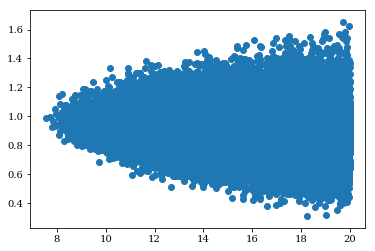

In [16]:
ind = variance < 20
plt.scatter(variance[ind], mean[ind])